# Predict KBO

## Predict the champion team of KBO(Korea Baseball Organization) league

Based on last 10yrs stats, let's predict the champ of KBO league

I'm going to use several classifier with SciKit-Learn and predict champs team and qualifiers for playoff.


### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Understanding the data set

In [2]:
# Read Data 
df = pd.read_csv('./data/kbo_data.csv')

In [3]:
df.head(5)

,WIN,POST,YEAR,TEAM,AVG,G,PA,AB,R,H,...,PB,SB_A,CS_A,CS%,SBA,SB,CS,SB%,OOB,PKO.1
0,N,N,2010,넥센,0.262,133,5139,4452,570,1165,...,9,160,68,29.8,191,135,56,70.7,56,5
1,N,Y,2010,두산,0.281,133,5252,4538,731,1276,...,8,119,44,27.0,189,128,61,67.7,56,12
2,N,Y,2010,롯데,0.288,133,5261,4673,773,1345,...,6,131,62,32.1,175,124,51,70.9,62,7
3,N,Y,2010,삼성,0.272,133,5287,4436,681,1207,...,6,134,65,32.7,213,158,55,74.2,54,8
4,N,N,2010,한화,0.244,133,5009,4321,543,1053,...,7,151,58,27.8,191,121,70,63.4,56,11


### Check stats for champion
Only use ratio features, because it is in middle of season.

- AVG : batting AVeraGe 
- OPS : On base Plus Slugging
- RISP : batting AVG at Runner In Scoring Position
- PH-BA : Pinch Hitter - Batting Average
- ERA : Earned Runs Average
- WHIP : Walks Plus Hits Divided by Innings Pitched
- FPCT : Fielding PerCenTage

In [4]:
# features : AVG, OPS, RISP(Runner In Scoring Position) AVG, PH-BA(Pinch Hitter - Batting Average), ERA, WHIP, FPCT(Fielding PerCenTage)
features = ['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']

In [5]:
list(df.loc[df['WIN'] == 1, features])

['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT']

In [6]:
df.loc[df['WIN'] == 'Y', features].mean()

AVG      0.288889
OPS      0.805778
RISP     0.300111
PH-BA    0.225222
ERA      4.206667
WHIP     1.384444
FPCT     0.984444
dtype: float64

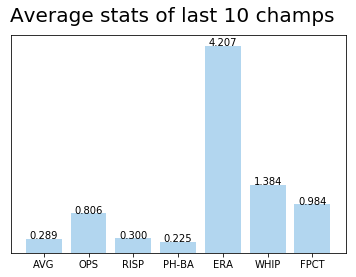

In [7]:
# Draw a chart with matplotlib

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(features, df.loc[df['WIN'] =='Y', features].mean(), color='#007acc', alpha=.3)
ax.grid(False)
ax.set_yticks([])

fig.suptitle('Average stats of last 10 champs', fontsize=20)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    label = '{:.3f}'.format(y_value)
    plt.annotate(label, (x_value, y_value), ha='center' )

plt.show()

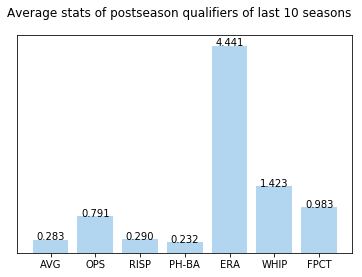

In [8]:
#plt.title('Average stats of last 10 champions', fontsize=25)

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(features, df.loc[df['POST'] =='Y', features].mean(), color='#007acc', alpha=.3)
ax.grid(False)
ax.set_yticks([])

fig.suptitle('Average stats of postseason qualifiers of last 10 seasons', fontsize=12)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    label = '{:.3f}'.format(y_value)
    plt.annotate(label, (x_value, y_value), ha='center' )

plt.show()

#### functions for checking the performance of model

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def print_metrics(labels, preds):
    '''Print score of performance of model'''
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

#### Data Cleaning & Setting

In [10]:
# Cleaning Data for Classifier
df['WIN'] = df['WIN'].map(lambda x: 0 if x == 'N' else 1)
df['POST'] = df['POST'].map(lambda x: 0 if x == 'N' else 1)

In [11]:
# Set target data frames
win_y = df['WIN']
post_y = df['POST']

In [12]:
# Only pick the features with Ratio because it is middle of season
ratio_X = df[['AVG', 'OPS', 'RISP', 'PH-BA', 'ERA', 'WHIP', 'FPCT', 'CS%', 'SB%']]

In [13]:
# Split data set for train & test model
X_train, X_test, y_train, y_test = train_test_split(ratio_X, win_y, test_size=.2)

#### Training a Model with training data

In [14]:
# Set pipeline with SS & Log_Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs'))
])

In [15]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

#### Check Performance of Model

In [16]:
test_preds = pipeline.predict(X_test)

In [17]:
print_metrics(y_test, test_preds)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


In [18]:
# current(1st of June) stat of KBO leagues 
stat_0601 = {
    'SK': [.251, .702, .282, .289, 3.64, 1.34, .982, 22.2, 75.4],
    'DOOSAN': [.273, .760, .271, .094, 3.13, 1.28, .985, 28.3, 69.0],
    ' LG': [.259, .686, .247, .209, 3.25, 1.26, .984, 16.1, 61.3],
    'NC': [.291, .796, .288, .129, 4.16, 1.38, .980, 45.5, 59.2],
    'KIWOOM': [.285, .776, .308, .237, 4.25, 1.37, .983, 31.0, 70.2],
    'HANWHA':[.253, .701, .259, .119, 4.67, 1.52, .982, 33.3, 74.6],
    'KT': [.270, .715, .267, .200, 4.86, 1.50, .977, 37.9, 69.8],
    'KIA': [.262, .713, .252, .154, 5.06, 1.56, .985, 31.7, 67.3],
    'SAMSUNG': [.266, .739, .256, .292, 4.39, 1.39, .978, 31.5, 75.4],
    'LOTTE': [.269, .718, .271, .224, 5.87, 1.70, .978, 32.2, 70.0],
}

In [19]:
for team, value in stat_0601.items():
    print(f'{team} :  {pipeline.predict_proba([value])[0][1]*100:.4}%')

SK :  1.171%
DOOSAN :  87.65%
 LG :  1.133%
NC :  34.92%
KIWOOM :  29.4%
HANWHA :  0.65%
KT :  0.06756%
KIA :  0.2376%
SAMSUNG :  0.06217%
LOTTE :  0.003337%


#### Training a model with whole data

Because of small amount of data, let's try training a model with whole data

In [20]:
# Train model with whole dataset
pipeline.fit(ratio_X, win_y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [21]:
test_preds = pipeline.predict(X_test)

In [22]:
print_metrics(y_test, test_preds)

Precision Score: 1.0
Recall Score: 1.0
Accuracy Score: 1.0
F1 Score: 1.0


In [23]:
predicts = {}
for team, value in stat_0601.items():
    proba = pipeline.predict_proba([value])[0][1]*100
    predicts[team] = proba
    print(f'{team} :  {proba:.4}%')

SK :  0.858%
DOOSAN :  89.14%
 LG :  0.7194%
NC :  38.34%
KIWOOM :  30.51%
HANWHA :  0.4719%
KT :  0.04692%
KIA :  0.1473%
SAMSUNG :  0.04548%
LOTTE :  0.001638%


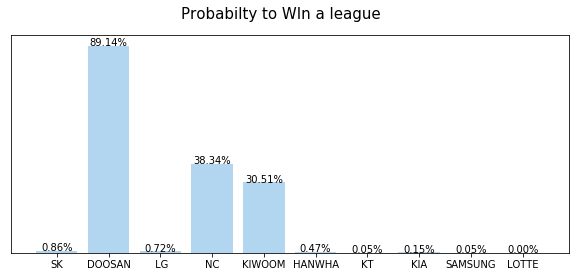

In [24]:
# Draw a chart
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(predicts.keys(), predicts.values(), color='#007acc', alpha=.3)
ax.grid(False)
ax.set_yticks([])

fig.suptitle('Probabilty to WIn a league', fontsize=15)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    label = '{:.2f}%'.format(y_value)
    plt.annotate(label, (x_value, y_value), ha='center' )

plt.show()

### Conclusion

Even though SK is leading the league, Doosan seems to be the most powerful team of stats.  
Let's see what is happening on this September